In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [152]:
# Read files MACA_SOCIOLOGICO.csv and MACA_LEXICO.csv
df_sociologico = pd.read_csv('MACA_SOCIOLOGICO.csv', sep=',')
df_lexico = pd.read_csv('MACA_LEXICO_2.csv', sep=';')

In [15]:
df_sociologico

,Informante,CORPUS,Genero,Edad,CentroPublicoOPrivado,CodigoDelCentro,NivelEducativo,RamaDeEso,RamaDeBachillerato,RamaDeLaUniversidad,UniversidadCarrera,PlanBilingue,AñosEnElPlanBilingue,IdiomaDelPlanBilingue,MismoInstituto,Qué instituto,OtrosEstudiosOficiales,LugarDeNacimiento,LugarDeResidenciaActual,HaResididoSiempreEnEstaLocalidad,LugarDeResidenciaAnterior,BarriodeMalaga,HaResididoSiempreEnEsteBarrio,BarrioDeResidenciaAnterior,TipoDVivienda,SituaciónFamiliar,EstudiosDelHermano1,TrabajoDelHermano1,EstudiosDelHermano2,TrabajoDelHermano2,EstudiosDelHermano3,TrabajoDelHermano3,EstudiosDelHermano4,TrabajoDelHermano4,EstudiosDelHermano5,TrabajoDelHermano5,EstudiosDelHermano6,TrabajoDelHermano6,SituacionEconomicaFamiliar,LugarDeNacimientoDeLaMadre,EdadMadreLlegaAMalaga,TiempoQueLlevaLaMadreEnMalaga,LugarDeNacimientoDelPadre,EdadPadreLlegaAMalaga,TiempoQueLlevaElPadreEnMalaga,EstudiosDeLaMadre,DetallesEstudiosDeLaMadre,EstudiosDelPadre,DetallesEstudiosDelPadre,TrabajoMadre,TrabajoPadre,NivelIdiomasMadre,SiProcedeNivelEspecífico,IdiomasMadre,NivelIdiomasPadre,SiProcedeNivelEspecífico.1,IdiomasPadre,NivelIdiomasInformante,SiProcedeNivelEspecífico.2,IdiomasInformante,LibrosAnualAficion,LibrosFrecuenciaFormatoFisico,LibrosFrecuenciaFormatoDigital,FrecuenciaLecturaPrensaLocal,FrecuenciaLecturaPrensaNacional,PrensaLocalNacionalFormatoFisico,PrensaLocalNacionalFormatoDigital,LecturaPrensaInternacional,FrecuenciaContenidosAudiovisuales,LugarContenidosAudiovisuales,TipoContenidosAudiovisuales,CadenasTV,PlataformasDirectoOContinuo,RedesSociales,ComunicacionDiaria,LealtadLocal,ObservacionesLealtadLocal,PronunciarYExpresarse,AndalucesPronunciación,RedPersonalDensidad,CompañerosDeClaseConocenAAmigosOFamiliares,TenerEnCuentaAntesDeTomarDecisiones,ConsultarAntesDeTomarUnaDecision,ReunirConTodosAmigosAlgunaVez,ReunirATodasLasPersonasAcontecimientoImportante,ReunirseConTodosAmigosPeriodicamente,RedPersonalMultiplicidad,VecinosMismoInstitutoFacultad,SalirConCompañerosDeClase,SalirConPersonasDelBarrioBloque,FamiliaEnElMismoBarrio,MejoresAmigosEnElBarrio,Algunos de los mejores amigos son familiares,Confianza,Vida habitual,PCPortatilTableta,Smartphone,AmigosFueraDeMalagaYAndalucía,ViajarEnVacaciones,AmigosConoceSoloPorInternet,ReferentesSociales,EspecificaReferentesSociales,Opinión en el hogar,OpinionDiferenteALaFamilia,FamiliaresRespetanFormaDePensar,DebateEnCasa,CharlaInformativaEducacionSexual,CharlaInformativaViolenciaDeGenero,CharlaInformativaInmigracion,ImportanteSerAceptadoEnElCirculo,Pareja
0,1,1,1,16,1,1,1,2.0,NaN,NaN,NaN,0.0,0.0,0,0.0,Portada Alta,0,1.0,1.0,0.0,1,5,0.0,18,3,6.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,1.0,NaN,NaN,4,9,9,9,0.0,1,0.0,NaN,0,0.0,NaN,0,1,NaN,1,0,9.0,9.0,2,0.0,1.0,1.0,0,0,1,2,"3,5",1,"3,4,5",3,2,NaN,3,0,5,1,1,1,1,0,1.0,2,1,0,0,1,0.0,0,2,3.0,1,1,1.0,0,0,3,2,1,1,1,1,1,1,0,1.0,0.0
1,2,1,1,15,1,2,1,2.0,NaN,NaN,NaN,0.0,0.0,0,1.0,NaN,0,1.0,1.0,1.0,1,4,1.0,4,1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1.0,NaN,NaN,1.0,NaN,NaN,7,9,7,9,1.0,1,0.0,NaN,0,2.0,NaN,1,2,NaN,1,0,4.0,0.0,3,4.0,3.0,4.0,0,3,3,"1,2,4,5","2,3,4","3,4","3,4","1,3",4,NaN,1,1,4,1,0,1,1,1,0.0,1,0,1,0,0,0.0,0,2,4.0,1,1,1.0,1,0,0,0,1,0,1,1,1,1,0,1.0,0.0
2,3,1,1,15,1,2,1,1.0,NaN,NaN,NaN,0.0,0.0,0,1.0,NaN,0,1.0,1.0,1.0,1,4,1.0,4,1,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,1.0,NaN,NaN,7,9,6,9,2.0,3,1.0,NaN,1,1.0,NaN,1,2,NaN,1,1,4.0,1.0,1,2.0,2.0,1.0,0,3,"1,3","2,3,4","2,3,5","3,4","3,4","1,2,3",3,NaN,3,1,4,1,1,1,1,0,0.0,3,0,0,1,1,1.0,0,3,5.0,1,1,1.0,1,1,0,0,1,0,1,0,1,1,0,1.0,0.0
3,4,1,1,15,1,2,1,1.0,NaN,NaN,NaN,0.0,0.0,0,1.0,NaN,0,1.0,1.0,1.0,1,4,1.0,4,2,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,1.0,NaN,NaN,6,9,3,9,0.0,1,0.0,NaN,0,0.0,NaN,0,1,NaN,1,0,0.0,0.0,1,1.0,0.0,1.0,0,1,4,3,5,"3,5","3,4","2,3,4",1,NaN,1,1,5,1,1,1,0,1,1.0,3,0,0,1,1,1.0,0,2,4.0,1,1,0.0,1,1,0,0,1,1,1,0,1,1,0,1.0,0.0
4,5,1,1,15,1,1,1,9.0,NaN,NaN,NaN,0.0,0.0,0,1.0,NaN,0,1.0,1.0,1.0,1,4,1.0,4,1,2.0,6.0,NaN,NaN,NaN,NaN,

In [21]:
df_lexico

,Datossociologicos,Informante,CentroDeInterés,Vocablos/Términos
0,0,1,0,"mascarilla, vacuna, sanidad, gel, PCR, antígeno"
1,0,1,1,"geografía, África, guiri, país, avión, lancha,..."
2,0,1,2,"LGTB(IQ+), feminista, huelga"
3,0,1,3,"huelga, lluvia, árbol, destrucción, Polo Sur, ..."
4,0,1,4,"perro, agua, gato, lobo, violencia, biología, ..."
...,...,...,...,...
6595,0,600,6,"democracia, impartido, texto, ley, juez/a, min..."
6596,0,600,7,"Pedro, (Pedro) Sánchez, perro, barato, mentira..."
6597,0,600,8,"colegio, instituto, docencia, bueno, important..."
6598,0,600,9,"Cataluña, euskera, idioma, dialecto, derecho, ..."


In [153]:
# For each unique value of 'Informante' in df_sociologico, append all the columns of the corresponding row in every row with same 'Informante' in df_lexico
for informante in df_sociologico['Informante'].unique():
    for idx in df_lexico[df_lexico['Informante'] == informante].index:
        df_lexico.loc[idx, df_sociologico.columns] = df_sociologico[df_sociologico['Informante'] == informante].values[0]

In [154]:
# Save df_lexico to df_lexico.csv
df_lexico.to_csv('df_lexico.csv', sep=';', index=False)

In [155]:
# Read df_lexico.csv
df_lexico = pd.read_csv('df_lexico.csv', sep=';')

In [156]:
# Create column of length of 'Vocablos/Términos' in df_lexico difined by number of ',' + 1
df_lexico['vocab_length'] = df_lexico['Vocablos/Términos'].apply(lambda x: len(x.split(',')))

In [157]:
df_lexico['CentroDeInterés'].value_counts()

0     600
1     600
2     600
3     600
4     600
5     600
6     600
7     600
8     600
9     600
10    600
Name: CentroDeInterés, dtype: int64

# Conjunto

In [64]:
def hist_comparison(df, target: str, comparison: str, legend: list = None,
                    xlabel: str = None, ylabel: str = None, title: str = None):
    max_length = df[target].max()
    bins = np.arange(0, max_length + 1.5) - 0.5

    unique_values = df[comparison].unique()
    for i, value in enumerate(unique_values):
        plt.hist(df[df[comparison] == value][target], bins=bins, alpha=0.5, 
                 label=legend[i] if legend else value)

    plt.grid()
    plt.legend()
    plt.xlabel(xlabel if xlabel else None)
    plt.ylabel(ylabel if ylabel else None)
    plt.title(title if title else None)
    plt.show()

In [55]:
# Same as above but with a box and whisker plot
def bw_comparison(df, target: str, comparison: str, legend: list = None,
                    xlabel: str = None, ylabel: str = None, title: str = None):
    unique_values = df[comparison].unique()
    for i, value in enumerate(unique_values):
        plt.boxplot(df[df[comparison] == value][target], positions=[i], 
                    labels=[legend[i] if legend else value])

    plt.grid()
    plt.xlabel(xlabel if xlabel else None)
    plt.ylabel(ylabel if ylabel else None)
    plt.title(title if title else None)
    plt.show()

In [ ]:
hist_comparison(df_lexico, target='vocab_length', comparison='NivelEducativo', 
                xlabel='Longitud de la lista', ylabel='Frecuencia')

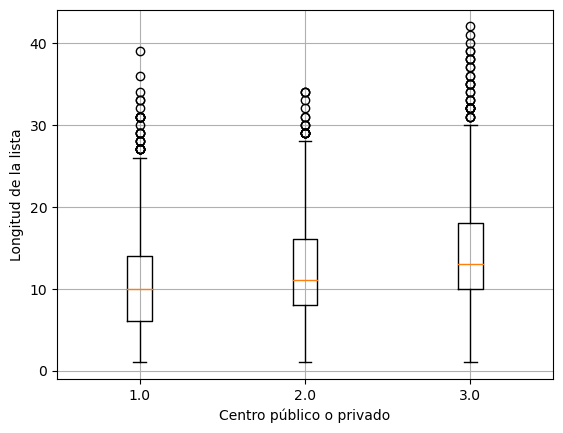

In [61]:
bw_comparison(df_lexico, target='vocab_length', comparison='NivelEducativo',
                xlabel='Centro público o privado', ylabel='Longitud de la lista')

# Centro de interés

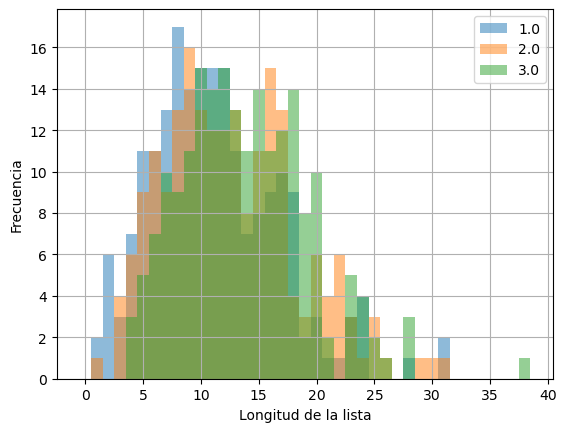

In [63]:
hist_comparison(df_lexico[df_lexico['CentroDeInterés'] == 1], 
                target='vocab_length', comparison='NivelEducativo', 
                xlabel='Longitud de la lista', ylabel='Frecuencia')

# Table

In [158]:
def get_vocab(df):
    vocab = []
    for idx in df.index:
        vocab.extend(df['Vocablos/Términos'][idx].split(', '))
    
    return vocab

In [178]:
def complexity_comparison(df, comparison: str):
    unique_values = df[comparison].unique()
    unique_values = unique_values[~np.isnan(unique_values)]
    unique_values.sort()

    complexity_df = pd.DataFrame(columns=['Longitud listas', 'Vocabulario único', 'Población'])
    for value in unique_values:
        vocab = get_vocab(df[df[comparison] == value])
        complexity_df.loc[value] = [df[df[comparison] == value]['vocab_length'].mean(), 
                                    len(list(set(vocab))), len(df[df[comparison] == value]['Informante'].unique())]

    return complexity_df

In [179]:
# Remap values of 'CentroPublicoOPrivado': 1 -> 1, 2 -> 2, 3 -> 2
df_lexico['CentroPublicoOPrivado'] = df_lexico['CentroPublicoOPrivado'].apply(lambda x: 2 if x == 3 or x == 2 else x)

In [186]:
study_df = pd.DataFrame(columns=['Estudio', 'Longitud listas', 'Vocabulario único', 'Población'])

tmp = complexity_comparison(df_lexico, comparison='Genero')
tmp['Estudio'] = 'Genero'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico, comparison='NivelEducativo')
tmp['Estudio'] = 'Nivel educativo'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico[df_lexico['NivelEducativo'] == 1], comparison='CentroPublicoOPrivado')
tmp['Estudio'] = 'Nivel estudios 1 - público / privado'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico[df_lexico['NivelEducativo'] == 2], comparison='CentroPublicoOPrivado')
tmp['Estudio'] = 'Nivel estudios 2 - público / privado'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico[df_lexico['NivelEducativo'] == 1], comparison='Genero')
tmp['Estudio'] = 'Nivel estudios 1 - género'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico[df_lexico['NivelEducativo'] == 2], comparison='Genero')
tmp['Estudio'] = 'Nivel estudios 2 - género'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico[df_lexico['NivelEducativo'] == 3], comparison='Genero')
tmp['Estudio'] = 'Nivel estudios 3 - género'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico[df_lexico['NivelEducativo'] == 3], comparison='RamaDeLaUniversidad')
tmp['Estudio'] = 'Rama universidad'
study_df = pd.concat([study_df, tmp])

tmp = complexity_comparison(df_lexico, comparison='CentroDeInterés')
tmp['Estudio'] = 'Centro de interés'
study_df = pd.concat([study_df, tmp])

for i in range(11):
    tmp = complexity_comparison(df_lexico[df_lexico['CentroDeInterés'] == i], comparison='NivelEducativo')
    tmp['Estudio'] = f'Centro de interés {i} - NivelEducativo'
    study_df = pd.concat([study_df, tmp])

for i in range(11):
    tmp = complexity_comparison(df_lexico[df_lexico['CentroDeInterés'] == i], comparison='RamaDeLaUniversidad')
    tmp['Estudio'] = f'Centro de interés {i} - RamaDeLaUniversidad'
    study_df = pd.concat([study_df, tmp])

for i in range(11):
    tmp = complexity_comparison(df_lexico[(df_lexico['CentroDeInterés'] == i) & (df_lexico['NivelEducativo'] == 1)], 
                                        comparison='CentroPublicoOPrivado')
    tmp['Estudio'] = f'Centro de interés {i} - ESO - CentroPublicoOPrivado'
    study_df = pd.concat([study_df, tmp])

for i in range(11):
    tmp = complexity_comparison(df_lexico[(df_lexico['CentroDeInterés'] == i) & (df_lexico['NivelEducativo'] == 2)], 
                                        comparison='CentroPublicoOPrivado')
    tmp['Estudio'] = f'Centro de interés {i} - Bachiller - CentroPublicoOPrivado'
    study_df = pd.concat([study_df, tmp])


# Convert columns 'Vocabulario único' and 'Población' to int
study_df['Vocabulario único'] = study_df['Vocabulario único'].astype(int)
study_df['Población'] = study_df['Población'].astype(int)

In [187]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(study_df)

,Estudio,Longitud listas,Vocabulario único,Población
1.0,Genero,11.698759,5987,271
2.0,Genero,12.812851,6336,324
3.0,Genero,16.527273,612,5
1.0,Nivel educativo,10.664091,4649,200
2.0,Nivel educativo,12.255455,4699,200
3.0,Nivel educativo,14.102273,5181,200
1.0,Nivel estudios 1 - público / privado,10.494545,3074,100
2.0,Nivel estudios 1 - público / privado,10.833636,3004,100
1.0,Nivel estudios 2 - público / privado,12.036364,3034,100
2.0,Nivel estudios 2 - público / privado,12.474545,3241,100


In [188]:
study_df.to_csv('Análisis agregado.csv', sep=';', index=True, )

In [151]:
df_lexico[df_lexico['CentroDeInterés'] == 0]['Informante'].value_counts()

401    2
1      1
395    1
397    1
398    1
      ..
201    1
202    1
203    1
204    1
600    1
Name: Informante, Length: 599, dtype: int64